# Bebop Model using Euler Integration¶

We define a input function that depends on the state. It is also called a control funtion. In this excersice we will use the following static control:

u = np.array([0.5,0,0,mt.radians(15),0,0])

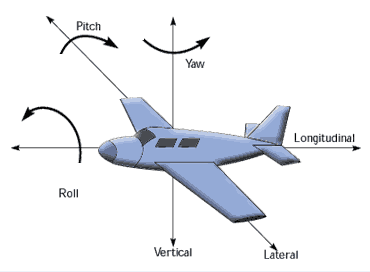

In [6]:
import numpy as np
import math as mt

def Input(x):
    # define the control that shuld be applied
    #v_f: velocidad frontal o longitudinal
    #v_l: velocidad lateral
    #v_v: velocidad vertical
    # u = (v_f, v_l, v_v, w_yaw, w_pitch, w_roll)
    yaw=mt.radians(15)
    u = np.array([0.5,0,0,yaw,0,0])
    return u

# Euler integration function
# in this case we integrate a number of steps
def integrate(F, Input, x, steps, h):
    T = []
    X = []
    t = 0
    T.append(t)
    X.append(x)
    i = 0
    while i < steps:
        x = x + h * F(x, Input(x))
        t = t + h
        X.append(x)
        T.append(t)
        i = i + 1
    return np.array(T), np.array(X)

## 1. Complete the code
Note that the state of the vehicle is defined as follows: x = (x,y,z,yaw(z),pitch(y),roll(x))

In [7]:
#TODO: define the state transition equation for the vehicle
def F(x,u):
    # X(x)
    x_dot = np.array([u[0] * mt.cos(x[3]) - u[1] * mt.sin(x[3]),
            u[0] * mt.sin(x[3]) + u[1] * mt.cos(x[3]),
            u[2],
            u[3],
            u[4],
            u[5]])
    return x_dot

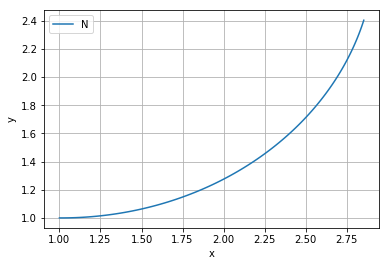

In [8]:
import matplotlib.pyplot as plt

#x = np.zeros(6) # Start of integration
t = 0
# initial state
x = np.array([1,1,0,0,0,0])

steps = 100 # End of integration
h = 0.05 # Step size

T,X = integrate(F,Input,x,steps,h)

plt.plot(X[:,0],X[:,1],'-')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Numerical'),loc=0)
plt.show()


# 2. Answer the following questions:
Let us assume the step size unit as seconds. How much time is represented in the simulation?

Si el paso es segundos, aproximadamente son 7 segundos los que representan la gráfica

Explain the behaviour of described in the graph

Tenemos un desplazamiento longitudinal en x, mientras que al mismo tiempo el drone está girando sobre su eje Z, lo que va a provocar es que se se genere un circulo en el transcurso del tiempo

# 3. Change the input of the model, save the graph and describe the new behaviour

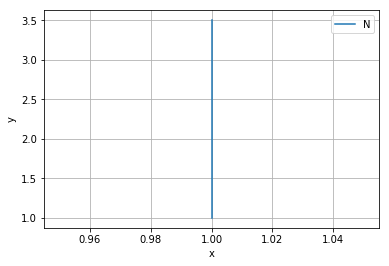

In [10]:
import numpy as np
import math as mt

def Input2(x):
    # define the control that shuld be applied
    #v_f: velocidad frontal o longitudinal
    #v_l: velocidad lateral
    #v_v: velocidad vertical
    # u = (v_f, v_l, v_v, w_yaw, w_pitch, w_roll)
    u = np.array([0,0.5,0,0,0,0])
    return u

T,X = integrate(F,Input2,x,steps,h)

plt.plot(X[:,0],X[:,1],'-')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Numerical'),loc=0)
plt.show()

Ahora la gráfica nos describe solo un desplazamiento lateral del drone